In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import naive_bayes, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [51]:
credit = pd.read_csv('Credit10K.csv')
credit

,PaymentHistory,WorkHistory,Reliability,Debit,Income,RatioDebInc,Assets,Worth,Profession,FutureIncome,Age,CreditWorthiness
0,Without_Reference,Unstable,Unreliable,a0_11100,s70001_more,Favorable,wealthy,High,Medium_income_profession,Promissing,a16_21,Negative
1,Aceptable,Unjustified_no_work,Unreliable,a0_11100,s70001_more,Favorable,average,High,Medium_income_profession,Promissing,a66_up,Negative
2,Aceptable,Unstable,Reliable,a25901_more,s30001_70000,Unfavorable,wealthy,High,Low_income_profession,Not_promissing,a16_21,Negative
3,Excellent,Unstable,Reliable,a25901_more,s30001_70000,Unfavorable,average,Medium,Medium_income_profession,Not_promissing,a16_21,Negative
4,Excellent,Unjustified_no_work,Unreliable,a11101_25900,s0_30000,Unfavorable,average,Low,Medium_income_profession,Not_promissing,a66_up,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Excellent,Unstable,Unreliable,a0_11100,s0_30000,Unfavorable,wealthy,High,High_income_profession,Promissing,a16_21,Negative
9996,NoAceptable,Justified_no_work,Unreliable,a25901_more,s30001_70000,Unfavorable,poor,Medium,Medium_income_profession,Not_promissing,a66_up,Negative
9997,NoAceptable,Justified_no_work,Unreliable,a11101_25900,s30001_70000,Favorable,poor,Medium,High_income_profession,Promissing,a16_21,Negative
9998,Aceptable,Stable,Reliable,a0_11100,s30001_70000,Favorable,average,Medium,Medium_income_profession,Promissing,a22_65,Positive


In [52]:
X_columns = credit.columns[:-1]
print(list(X_columns))

['PaymentHistory', 'WorkHistory', 'Reliability', 'Debit', 'Income', 'RatioDebInc', 'Assets', 'Worth', 'Profession', 'FutureIncome', 'Age']


In [140]:
for column in X_columns:
    print(f'{column} : {credit[column].unique()}')

PaymentHistory : ['Without_Reference' 'Aceptable' 'Excellent' 'NoAceptable']
WorkHistory : ['Unstable' 'Unjustified_no_work' 'Stable' 'Justified_no_work']
Reliability : ['Unreliable' 'Reliable']
Debit : ['a0_11100' 'a25901_more' 'a11101_25900']
Income : ['s70001_more' 's30001_70000' 's0_30000']
RatioDebInc : ['Favorable' 'Unfavorable']
Assets : ['wealthy' 'average' 'poor']
Worth : ['High' 'Medium' 'Low']
Profession : ['Medium_income_profession' 'Low_income_profession'
 'High_income_profession']
FutureIncome : ['Promissing' 'Not_promissing']
Age : ['a16_21' 'a66_up' 'a22_65']


In [53]:
print(credit.shape)

(10000, 12)


In [54]:
dataset_size = credit.shape[0]

In [55]:
credit = pd.read_csv('Credit10K.csv')
credit['Approve'] = credit['CreditWorthiness'] == 'Positive'
credit

,PaymentHistory,WorkHistory,Reliability,Debit,Income,RatioDebInc,Assets,Worth,Profession,FutureIncome,Age,CreditWorthiness,Approve
0,Without_Reference,Unstable,Unreliable,a0_11100,s70001_more,Favorable,wealthy,High,Medium_income_profession,Promissing,a16_21,Negative,False
1,Aceptable,Unjustified_no_work,Unreliable,a0_11100,s70001_more,Favorable,average,High,Medium_income_profession,Promissing,a66_up,Negative,False
2,Aceptable,Unstable,Reliable,a25901_more,s30001_70000,Unfavorable,wealthy,High,Low_income_profession,Not_promissing,a16_21,Negative,False
3,Excellent,Unstable,Reliable,a25901_more,s30001_70000,Unfavorable,average,Medium,Medium_income_profession,Not_promissing,a16_21,Negative,False
4,Excellent,Unjustified_no_work,Unreliable,a11101_25900,s0_30000,Unfavorable,average,Low,Medium_income_profession,Not_promissing,a66_up,Negative,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Excellent,Unstable,Unreliable,a0_11100,s0_30000,Unfavorable,wealthy,High,High_income_profession,Promissing,a16_21,Negative,False
9996,NoAceptable,Justified_no_work,Unreliable,a25901_more,s30001_70000,Unfavorable,poor,Medium,Medium_income_profession,Not_promissing,a66_up,Negative,False
9997,NoAceptable,Justified_no_work,Unreliable,a11101_25900,s30001_70000,Favorable,poor,Medium,High_income_profession,Promissing,a16_21,Negative,False
9998,Aceptable,Stable,Reliable,a0_11100,s30001_70000,Favorable,average,Medium,Medium_income_profession,Promissing,a22_65,Positive,True


In [56]:
y_column = credit.columns[-1]
print(y_column)
print(credit[y_column].unique())

Approve
[False  True]


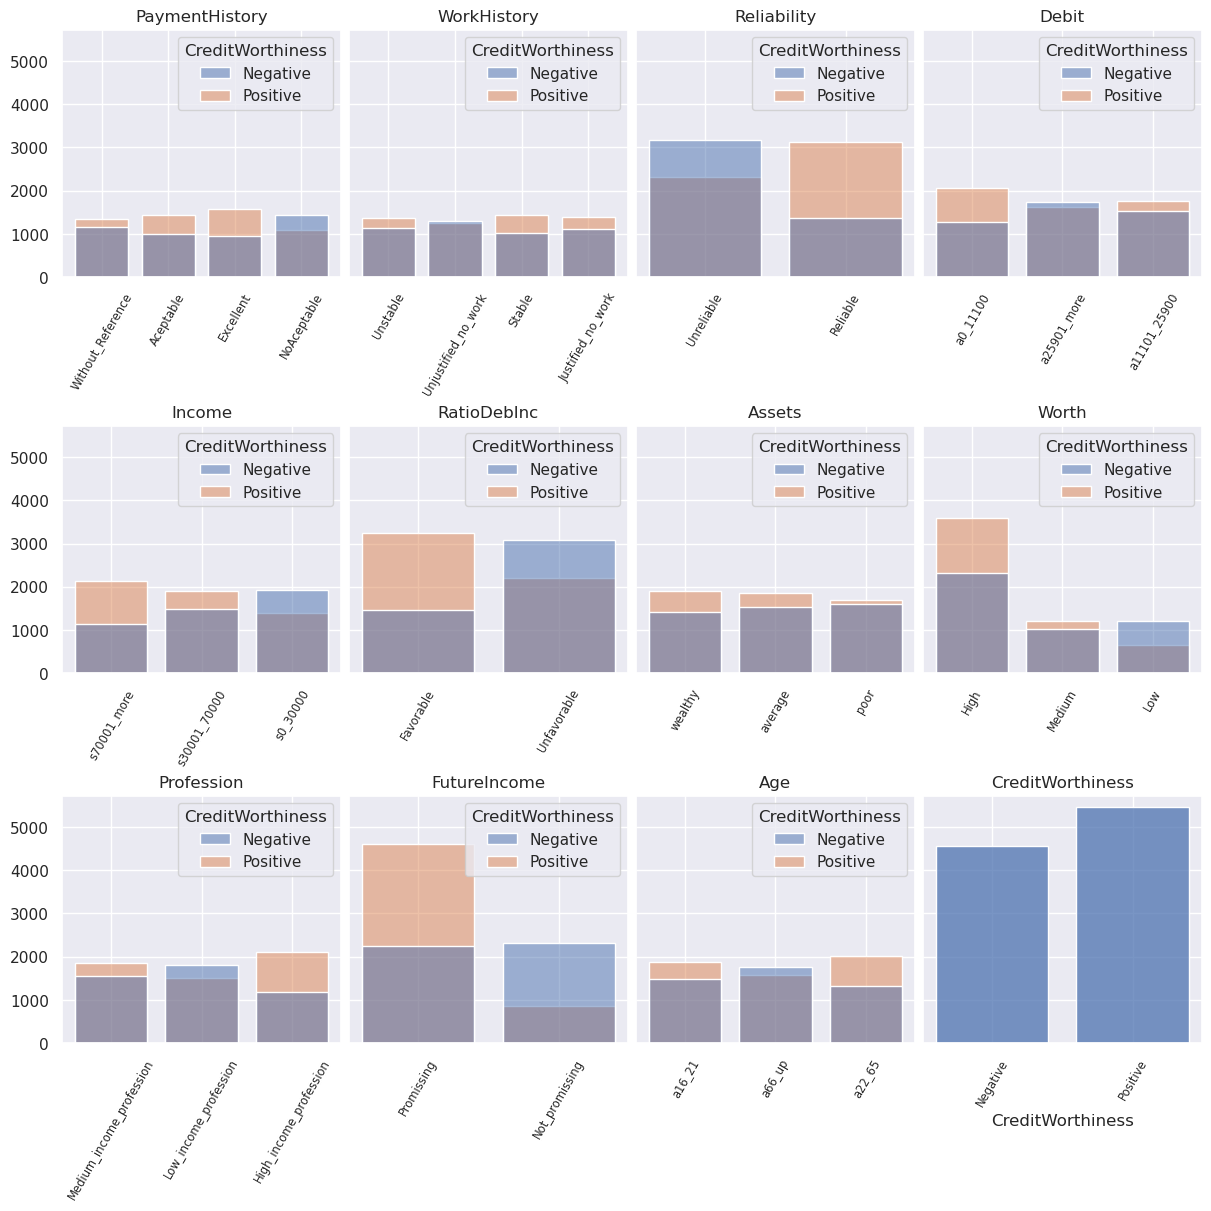

In [180]:
sns.set_theme()
fig, axs = plt.subplots(ncols=4, 
                        nrows=3, 
                        sharex=False, 
                        sharey=True, 
                        constrained_layout=True, 
                        squeeze=True, 
                        figsize=(12, 12))
for i, feature in enumerate(X_columns):
    ax = axs[i // 4, i % 4]
    sns.histplot(ax=ax, data=credit, x=feature, shrink=0.8, stat='count', hue='CreditWorthiness')
    ax.set(title=feature)
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    ax.tick_params(axis='x', rotation=60, labelsize='x-small')

ax = axs[2, 3]
sns.histplot(ax=ax, data=credit, x='CreditWorthiness', shrink=0.8, stat='count')
ax.set(title='CreditWorthiness')
# ax.set(xlabel=None)
ax.set(ylabel=None)
ax.tick_params(axis='x', rotation=60, labelsize='x-small')

    
plt.show()

**1. Ordinal Encoder**

In [181]:
X = credit[X_columns]
y = credit[y_column]

In [182]:
encoder = OrdinalEncoder()
encoder.fit(X)
X = encoder.transform(X)

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)

In [253]:
model = naive_bayes.CategoricalNB()

In [254]:
model.fit(X=X_train, y=y_train)
y_pred = model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy = {accuracy:0.3f}')

precision = metrics.precision_score(y_test, y_pred)
print(f'Precision = {precision:0.3f}')

recall = metrics.recall_score(y_test, y_pred)
print(f'Recall = {recall:0.3f}')

f1_score = metrics.f1_score(y_test, y_pred)
print(f'F1-Score = {f1_score:0.3f}')

# roc_auc_score = metrics.roc_auc_score(y_true=y_test, y_score=y_pred)
# print(f'ROC AUC = {roc_auc_score:0.0f}')

confusion_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred, normalize='all')
print('Confusion matrix:')
print(confusion_matrix)

Accuracy = 0.704
Precision = 0.712
Recall = 0.754
F1-Score = 0.733
Confusion matrix:
[[0.2984 0.1638]
 [0.1322 0.4056]]


In [229]:
train_sizes = np.arange(start=0.05, stop=1.0, step=0.05)
size = np.size(train_sizes)
num_trials = 100

accuracy = np.zeros((size, num_trials))
precision = np.zeros((size, num_trials))
recall = np.zeros((size, num_trials))
f1_score = np.zeros((size, num_trials))
# roc_auc_score = np.zeros((size, num_trials))
# auc_modified = np.zeros((size, num_trials))

model = naive_bayes.CategoricalNB()

for i, train_size in enumerate(train_sizes):
    for j in range(num_trials):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy[i, j] = metrics.accuracy_score(y_test, y_pred)
        precision[i, j] = metrics.precision_score(y_test, y_pred)
        recall[i, j] = metrics.recall_score(y_test, y_pred)
        f1_score[i, j] = metrics.f1_score(y_test, y_pred)
        # roc_auc_score[i, j] = metrics.roc_auc_score(y_pred, y_test)
        # auc_modified[i, j] = metrics.auc(y_pred, y_test) / (1 - train_size)

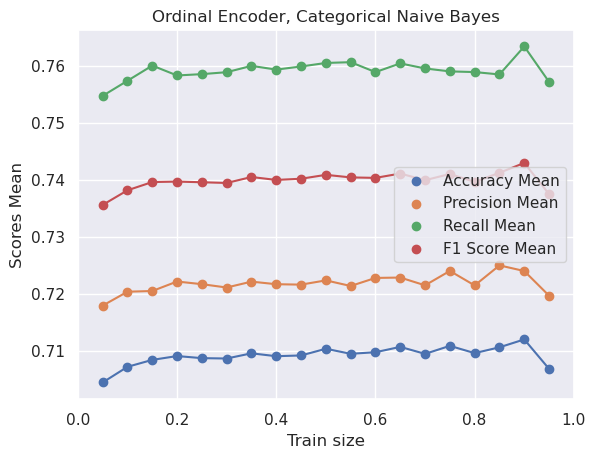

In [250]:
sns.set_theme()

# Mean
plt.plot(train_sizes, np.mean(accuracy, axis=1))
plt.scatter(train_sizes, np.mean(accuracy, axis=1), label='Accuracy Mean')

plt.plot(train_sizes, np.mean(precision, axis=1))
plt.scatter(train_sizes, np.mean(precision, axis=1), label='Precision Mean')

plt.plot(train_sizes, np.mean(recall, axis=1))
plt.scatter(train_sizes, np.mean(recall, axis=1), label='Recall Mean')

plt.plot(train_sizes, np.mean(f1_score, axis=1))
plt.scatter(train_sizes, np.mean(f1_score, axis=1), label='F1 Score Mean')

plt.xlim((0.0, 1.0))
# plt.ylim((0.0, 1.0))

plt.xlabel('Train size')
plt.ylabel('Scores Mean')

plt.legend()
plt.title('Ordinal Encoder, Categorical Naive Bayes')
plt.show()

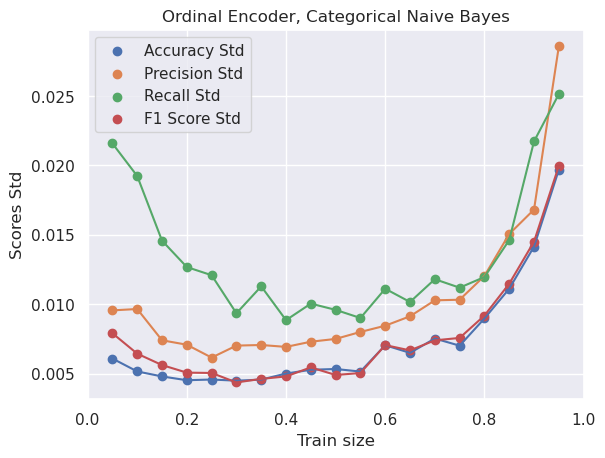

In [251]:
sns.set_theme()

# Std
plt.plot(train_sizes, np.std(accuracy, axis=1))
plt.scatter(train_sizes, np.std(accuracy, axis=1), label='Accuracy Std')

plt.plot(train_sizes, np.std(precision, axis=1))
plt.scatter(train_sizes, np.std(precision, axis=1), label='Precision Std')

plt.plot(train_sizes, np.std(recall, axis=1))
plt.scatter(train_sizes, np.std(recall, axis=1), label='Recall Std')

plt.plot(train_sizes, np.std(f1_score, axis=1))
plt.scatter(train_sizes, np.std(f1_score, axis=1), label='F1 Score Std')

plt.xlim((0.0, 1.0))
# plt.ylim((0.0, 1.0))

plt.xlabel('Train size')
plt.ylabel('Scores Std')

plt.legend()
plt.title('Ordinal Encoder, Categorical Naive Bayes')
plt.show()

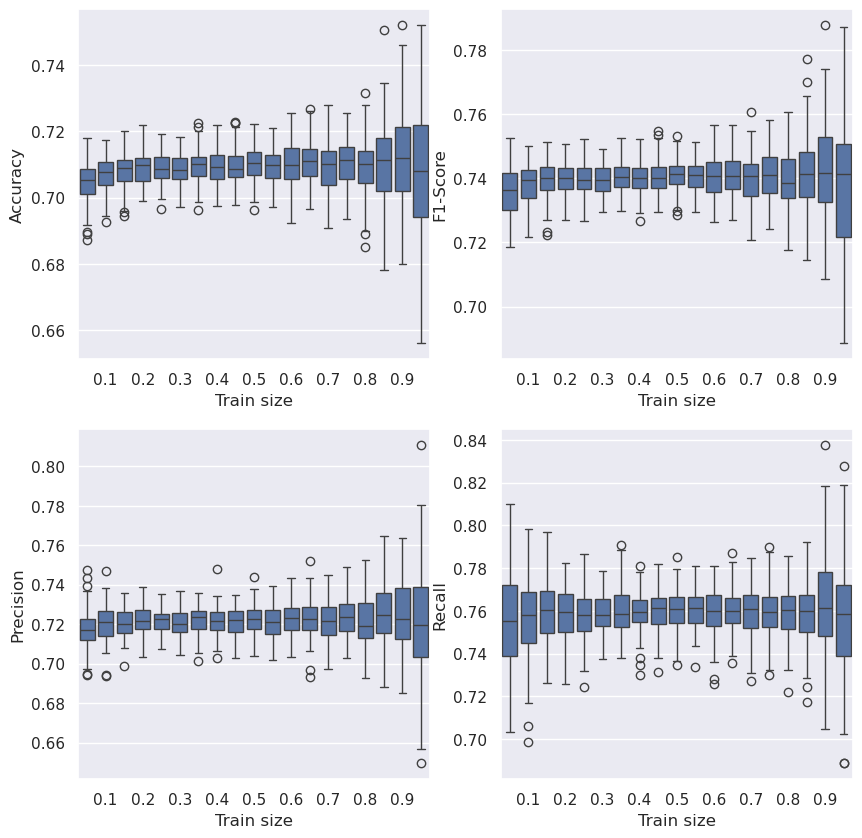

In [245]:
sns.set_theme()
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(10, 10))

axs[0, 0].set(xlabel='Train size')
axs[0, 0].set(ylabel='Accuracy')
sns.boxplot(ax=axs[0, 0], data=accuracy.T, color='b')
axs[0, 0].set_xticks(axs[0, 0].get_xticks()[1::2], np.round(train_sizes[1::2], 2))

axs[0, 1].set(xlabel='Train size')
axs[0, 1].set(ylabel='F1-Score')
sns.boxplot(ax=axs[0, 1], data=f1_score.T, color='b')
axs[0, 1].set_xticks(axs[0, 1].get_xticks()[1::2], np.round(train_sizes[1::2], 2))

axs[1, 0].set(xlabel='Train size')
axs[1, 0].set(ylabel='Precision')
sns.boxplot(ax=axs[1, 0], data=precision.T, color='b')
axs[1, 0].set_xticks(axs[1, 0].get_xticks()[1::2], np.round(train_sizes[1::2], 2))

axs[1, 1].set(xlabel='Train size')
axs[1, 1].set(ylabel='Recall')
sns.boxplot(ax=axs[1, 1], data=recall.T, color='b')
axs[1, 1].set_xticks(axs[1, 1].get_xticks()[1::2], np.round(train_sizes[1::2], 2))

plt.show()

**2. One-Hot Encoder**

In [257]:
credit = pd.read_csv('Credit10K.csv')
credit['Approve'] = credit['CreditWorthiness'] == 'Positive'

X_columns = credit.columns[:-2]
y_column = credit.columns[-1]

X = credit[X_columns]
y = credit[y_column]

In [258]:
encoder = OneHotEncoder()
encoder.fit(X)
X = encoder.transform(X)

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)

In [260]:
model = naive_bayes.BernoulliNB()

In [261]:
model.fit(X=X_train, y=y_train)
y_pred = model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy = {accuracy:0.3f}')

precision = metrics.precision_score(y_test, y_pred)
print(f'Precision = {precision:0.3f}')

recall = metrics.recall_score(y_test, y_pred)
print(f'Recall = {recall:0.3f}')

f1_score = metrics.f1_score(y_test, y_pred)
print(f'F1-Score = {f1_score:0.3f}')

# roc_auc_score = metrics.roc_auc_score(y_true=y_test, y_score=y_pred)
# print(f'ROC AUC = {roc_auc_score:0.0f}')

confusion_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred, normalize='all')
print('Confusion matrix:')
print(confusion_matrix)

Accuracy = 0.710
Precision = 0.725
Recall = 0.742
F1-Score = 0.733
Confusion matrix:
[[0.3108 0.1514]
 [0.139  0.3988]]
